In [44]:
from google.colab import drive
drive.mount('/content/drive', force_remount=True)

Mounted at /content/drive


In [45]:
!ls

drive  sample_data


In [46]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.svm import SVC
from sklearn.impute import SimpleImputer
from scipy import stats
import numpy as np

In [47]:
file_path = "drive/MyDrive/synthetic_network_traffic.csv"
data = pd.read_csv(file_path)

In [48]:
num_cols = ['SourcePort', 'DestinationPort', 'BytesSent', 'BytesReceived', 'PacketsSent', 'PacketsReceived', 'Duration']
cat_cols = ['SourceIP', 'DestinationIP', 'Protocol']


In [49]:
imputer = SimpleImputer(strategy='median')
data[num_cols] = imputer.fit_transform(data[num_cols])


In [50]:
data = data.dropna(subset=cat_cols)

In [51]:
print(cat_cols)

['SourceIP', 'DestinationIP', 'Protocol']


In [52]:
encoder = LabelEncoder()

for col in cat_cols:
    data[col] = encoder.fit_transform(data[col])

data.head()

SourceIP  DestinationIP  SourcePort  DestinationPort  Protocol  BytesSent  \
0    690634         444942    0.647689         1.523030    407921  -0.234137   
1    321733         320756    0.241962        -1.913280     42024  -0.562288   
2    928781         410724    0.067528        -1.424748    293311   0.110923   
3    274170         967926   -0.013497        -1.057711    795068  -1.220844   
4    770330         568280   -0.115648        -0.301104     69299  -0.719844   

   BytesReceived  PacketsSent  PacketsReceived  Duration  IsAnomaly  
0       1.579213     0.767435        -0.469474  0.542560          0  
1      -1.012831     0.314247        -0.908024 -1.412304          0  
2      -1.150994     0.375698        -0.600639 -0.291694          0  
3       0.208864    -1.959670        -1.328186  0.196861          0  
4      -0.460639     1.057122         0.343618 -1.763040          0

In [53]:
scaler = StandardScaler()
data[num_cols] = scaler.fit_transform(data[num_cols])


In [54]:
for col in num_cols:
    data[col + '_mean'] = data[col].mean()
    data[col + '_std'] = data[col].std()
    data[col + '_min'] = data[col].min()
    data[col + '_max'] = data[col].max()
    data[col + '_skew'] = data[col].skew()
    data[col + '_kurt'] = data[col].kurt()
    data[col + '_median'] = data[col].median()
    data[col + '_var'] = data[col].var()
    data[col + '_iqr'] = data[col].quantile(0.75) - data[col].quantile(0.25)
    data[col + '_cv'] = data[col].std() / data[col].mean()


for col in cat_cols:
    data[col + '_freq'] = data[col].value_counts()
    data[col + '_mode'] = data[col].mode()[0]
    data[col + '_entropy'] = stats.entropy(data[col].value_counts())

In [55]:
z_scores = stats.zscore(data[num_cols])
data = data[(np.abs(z_scores) < 3).all(axis=1)]

In [56]:
num_cols = data.select_dtypes(include=["int", "float"]).columns
corr_matrix = data[num_cols].corr()
corr_features = set()
for i in range(len(corr_matrix.columns)):
    for j in range(i):
        if abs(corr_matrix.iloc[i, j]) > 0.8:
            colname = corr_matrix.columns[i] if corr_matrix.columns[i] not in corr_features else corr_matrix.columns[j]
            corr_features.add(colname)
data.drop(corr_features, axis=1, inplace=True)


In [57]:
data['IsAnomaly'] = data['IsAnomaly'].astype(int)

In [58]:
X = data.drop('IsAnomaly', axis=1)
y = data['IsAnomaly']

In [59]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [60]:
clf = SVC()

In [61]:
clf.fit(X_train, y_train)

SVC()

In [62]:
y_pred = clf.predict(X_test)

In [63]:
print(y_pred)

[0 0 0 ... 0 0 0]


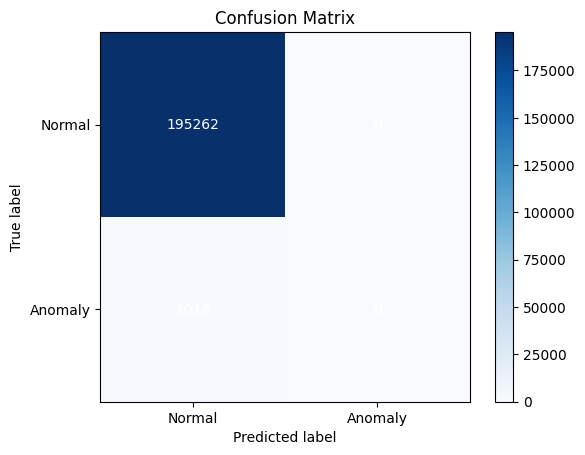

In [65]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test, y_pred)

class_labels = ['Normal', 'Anomaly']

plt.imshow(cm, interpolation='nearest', cmap=plt.cm.Blues)
plt.title('Confusion Matrix')
plt.colorbar()
tick_marks = np.arange(len(class_labels))
plt.xticks(tick_marks, class_labels)
plt.yticks(tick_marks, class_labels)

for i in range(len(class_labels)):
    for j in range(len(class_labels)):
        plt.text(j, i, str(cm[i][j]), ha='center', va='center', color='white')

plt.xlabel('Predicted label')
plt.ylabel('True label')
plt.show()


In [66]:
# prompt: acurracy etc

from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Calculate accuracy, precision, recall, and F1 score
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

# Print the results
print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)


Accuracy: 0.994823668470231
Precision: 0.0
Recall: 0.0
F1 Score: 0.0


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
